# Practical 2: Generative and Discriminative Models

## Making Naive Bayes

In [35]:
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
X, y = iris['data'], iris['target']

N, D = X.shape
Ntrain = int(0.8 * N)
shuffler = np.random.permutation(N)
Xtrain = X[shuffler[:Ntrain]]
ytrain = y[shuffler[:Ntrain]]
print(Xtrain.shape)
print(ytrain.shape)
Xtest = X[shuffler[Ntrain:]]
ytest = y[shuffler[Ntrain:]]

print(X, y)
# print(y == 0)
# print(X[y == 0].shape)
# print(X.shape)

(120, 4)
(120,)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1

In [36]:
import _pickle as cp
import matplotlib.pyplot as plt
import numpy as np
X, y = cp.load(open('voting.pickle', 'rb'))

N, D = X.shape
N_train = int(0.8 * N)
N_test = N - N_train
X_train = X[:N_train]
y_train = y[:N_train]
X_test = X[N_train:]
y_test = y[N_train:]

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(y)

X shape: (232, 16)
y shape: (232,)
[1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0.]


In [37]:
import math

class NBC:
    def __init__(self, feature_types, num_classes):
        self.feature_types = feature_types
        self.num_classes = num_classes
        self.params = []
        self.epsilon = 1e-5 # to avoid divide by zero
        self.priors = []
    
    # create univariate Gaussian distributions with (mean, variance)
    # set of distributions for EACH CLASS
    def fit(self, Xtrain, ytrain):
        # np.unique(ytrain)
        for i in range(self.num_classes):
            class_indicies = (ytrain == i)
            # print(class_indicies.shape)
            # print(X.shape)
            X_of_class = Xtrain[class_indicies]
            means = np.mean(X_of_class, axis=0)
            # print(means)
            stds = np.std(X_of_class, axis=0) + self.epsilon
            # print(stds)
            self.params.append((means, stds))
            self.priors.append(np.mean(ytrain == i) + self.epsilon)
    
    def GaussianProb(means, stds, value):
        return (1.0 / math.sqrt(2.0 * math.pi)) * np.exp((-0.5) * ((value - means)/stds)**2)
    
    # compute the class conditional probabilities for the new inputs on all classes
    # then return the classes with the largest probability for each data point
    def predict(self, Xtest):
        class_probs = np.zeros((Xtest.shape[0], self.num_classes))

        # calculate the probability that we would observe X given our parameters for each class
        for i in range(self.num_classes):
            param_means, param_stds = self.params[i]

            # matrix same shape as Xtest
            # meaning prob(this data comes from class i)
            probs = NBC.GaussianProb(param_means, param_stds, Xtest)
            # print(probs)

            # add epsilon to avoid dividing by zero
            probs = probs + self.epsilon
            logprobs = np.log(probs)

            # adding each row together -> meaning the prob row x's flower is class i
            probClassI = np.sum(logprobs, axis=1) 
            # add the prior information
            wpriors = probClassI + np.log(self.priors[i])

            # print(wpriors)

            # array with 
            # totals = np.sum(logprobs, axis=1) + np.log(self.priors[i])
            # print(total)
            class_probs[:,i] = wpriors

        # print(class_probs)
        return np.argmax(class_probs, axis=1)



In [38]:
nbc = NBC(feature_types=['r','r','r','r'], num_classes=3)
print(Xtrain.shape, ytrain.shape)
print(Xtest.shape, ytest.shape)
nbc.fit(Xtrain, ytrain)
print(f"Params: {nbc.params}")
print(f"Priors: {nbc.priors}")
# print(Xtest)
yhat = nbc.predict(Xtest)
test_accuracy = np.mean(yhat == ytest)
print(ytest)
print(f"Test accuracy: {test_accuracy}")

(120, 4) (120,)
(30, 4) (30,)
Params: [(array([5.005 , 3.41  , 1.4625, 0.245 ]), array([0.37480995, 0.38975351, 0.17985368, 0.09206976])), (array([5.94  , 2.77  , 4.24  , 1.3175]), array([0.50140805, 0.31560468, 0.4592485 , 0.19221757])), (array([6.625, 2.97 , 5.54 , 2.025]), array([0.64450593, 0.30758113, 0.56027779, 0.24774978]))]
Priors: [0.3333433333333333, 0.3333433333333333, 0.3333433333333333]
[0 0 0 1 1 2 0 2 2 2 0 1 0 2 1 1 2 1 2 0 1 2 0 2 0 1 0 1 1 2]
Test accuracy: 0.9333333333333333


## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

logRegModel = LogisticRegression().fit(Xtrain, ytrain)
logRegModel.score(Xtest, ytest)

/home/simon/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9666666666666667

### Handin 1: If I wanted to add lambdaW_TW for regularization and set lambda = 0.1, what calue of C would I set in the sklearn implementation?

From the docs
> C : float, default=1.0
> Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.  

Therefore C would be (1 / 0.1) = 10

## Experiments
Comparing classification error of NBC and LR on increasingly large training datasets.

In [56]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris['data'], iris['target']

N, D = X.shape
Ntrain = int(0.8 * N)

REPS = 200
nbc_test_errors = np.zeros((REPS, 10))
lr_test_errors = np.zeros((REPS, 10))

for i in range(REPS):
    for k in range(10):
        # only grab the first (10k)% of data for training
        PartTrain = int(Ntrain // (1 / (0.1 * (k + 1))))
        # print(PartTrain)

        shuffler = np.random.permutation(N)
        Xtrain = X[shuffler[:PartTrain]]
        ytrain = y[shuffler[:PartTrain]]
        Xtest = X[shuffler[Ntrain:]]
        ytest = y[shuffler[Ntrain:]]

        # train models and evaluate them
        logRegModel = LogisticRegression().fit(Xtrain, ytrain)
        lr_test_errors[i][k] = 1 - logRegModel.score(Xtest, ytest)
        
        nbc = NBC(feature_types=['r','r','r','r'], num_classes=3)
        nbc.fit(Xtrain, ytrain)
        yhat = nbc.predict(Xtest)
        test_accuracy = np.mean(yhat == ytest)
        # print(f"test acc: {test_accuracy}")
        nbc_test_errors[i][k] = 1 - test_accuracy
# print(nbc_test_errors)
average_nbc_errors = np.mean(nbc_test_errors, axis=0)
average_lr_errors = np.mean(lr_test_errors, axis=0)

/home/simon/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/simon/miniconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/simon/miniconda3/lib/python3.12/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/simon/miniconda3/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axi

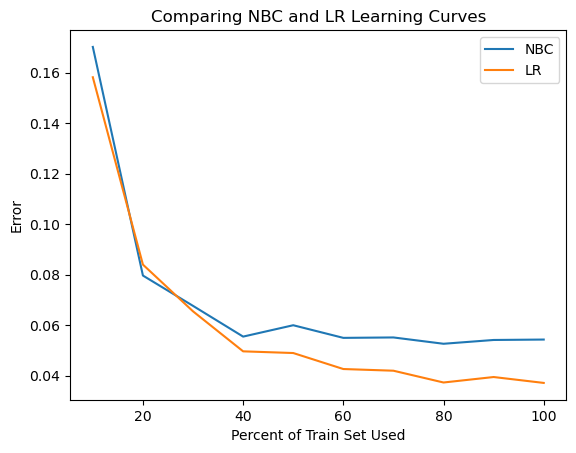

In [57]:
# plot curves
import matplotlib.pyplot as plt

plt.plot([i for i in range(10, 110, 10)], average_nbc_errors, label='NBC',)
plt.plot([i for i in range(10, 110, 10)], average_lr_errors, label='LR',)
plt.xlabel("Percent of Train Set Used")
plt.ylabel("Error")
plt.title("Comparing NBC and LR Learning Curves")
plt.legend()
plt.show()

In [62]:
import pickle as cp
X, y = cp.load(open('voting.pickle', 'rb'))

N, D = X.shape
print(X.shape)
Ntrain = int(0.8 * N)

REPS = 200
nbc_test_errors = np.zeros((REPS, 10))
lr_test_errors = np.zeros((REPS, 10))

for i in range(REPS):
    for k in range(10):
        # only grab the first (10k)% of data for training
        PartTrain = int(Ntrain // (1 / (0.1 * (k + 1))))
        # print(PartTrain)

        shuffler = np.random.permutation(N)
        Xtrain = X[shuffler[:PartTrain]]
        ytrain = y[shuffler[:PartTrain]]
        Xtest = X[shuffler[Ntrain:]]
        ytest = y[shuffler[Ntrain:]]

        # train models and evaluate them
        logRegModel = LogisticRegression().fit(Xtrain, ytrain)
        lr_test_errors[i][k] = 1 - logRegModel.score(Xtest, ytest)
        
        nbc = NBC(feature_types=['r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r'], num_classes=2)
        nbc.fit(Xtrain, ytrain)
        yhat = nbc.predict(Xtest)
        test_accuracy = np.mean(yhat == ytest)
        # print(f"test acc: {test_accuracy}")
        nbc_test_errors[i][k] = 1 - test_accuracy
        
average_nbc_errors = np.mean(nbc_test_errors, axis=0)
average_lr_errors = np.mean(lr_test_errors, axis=0)

(232, 16)


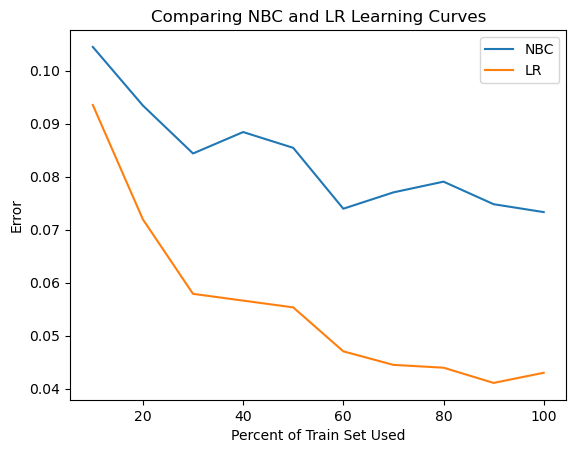

In [63]:
# plot curves
import matplotlib.pyplot as plt

plt.plot([i for i in range(10, 110, 10)], average_nbc_errors, label='NBC',)
plt.plot([i for i in range(10, 110, 10)], average_lr_errors, label='LR',)
plt.xlabel("Percent of Train Set Used")
plt.ylabel("Error")
plt.title("Comparing NBC and LR Learning Curves")
plt.legend()
plt.show()